In [1]:
import py4DSTEM
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.transform import Rotation as R
from tqdm import tqdm
print(py4DSTEM.__version__)

0.14.9


In [2]:
def defMaterial(positions, numbers, cell):
    material = py4DSTEM.process.diffraction.Crystal(positions, numbers, cell)
    material.plot_structure(figsize=(4,4))
    return material

In [3]:
def simImg(material, thickness, thicknessStep = 1, semiAngle = 9.75, angleStep = 1, mistilt = 0, tiltStep = 1, zoneAxis = [0, 1, 1], accV = 200e3):
    # Calculate structure factors
    material.calculate_structure_factors(k_max=2.0, tol_structure_factor=0.0)

    # Convert the V_g to relativistic-corrected U_g
    material.calculate_dynamical_structure_factors(accV, "WK-CP", k_max=2.0, thermal_sigma=0.08, tol_structure_factor=0.0)

    # Generate a kinemaical diffraction pattern, which will set which beams are included in
    # the dynamical matrix.
    beams = material.generate_diffraction_pattern(zone_axis_lattice=zoneAxis, tol_intensity=0., k_max=2.5, tol_excitation_error_mult=1)

    py4DSTEM.process.diffraction.plot_diffraction_pattern(
        beams,
        scale_markers=1000,
        shift_labels=0.05,
        # shift_marker=0.004,
        min_marker_size=0,
        figsize = (4,4),
    )

    # Generate a converged beam electron diffraction pattern.
    thickness *= 10

    DP = material.generate_CBED(
        beams,
        thickness=thickness,
        alpha_mrad=semiAngle,
        pixel_size_inv_A=0.01,
        DP_size_inv_A=1.1, # Use this to crop the patterns, or leave as None to auto-size to fit the entire pattern
        zone_axis_lattice=zoneAxis,
    )

    fig,ax = py4DSTEM.visualize.show(
        DP,
        ticks = False,
        mask_alpha = 0.99,
        returnfig=True
    )
    # Python program to explain os.mkdir() method 
    # importing os module 
    import os 
    # Directory 
    directory = "simulationss"
    # Parent Directory path 
    parent_dir = "C:/Users/Angelo Carrion/"
    # Path 
    global path 
    path = os.path.join(parent_dir, directory)
    # Create the directory 
    # directory in 
    # parent directory
    if os.path.exists(path):
        add_on="/"
        full_path = ''.join([path ,add_on])
        fig.savefig(full_path + f"{(thickness/10):0.0f} nm.tif")
    else:
        os.mkdir(path)
        print("Directory '% s' created" % directory)
        add_on="/"
        full_path = ''.join([path ,add_on])
        fig.savefig(full_path + f"{(thickness/10):0.0f} nm.tif")
    return path

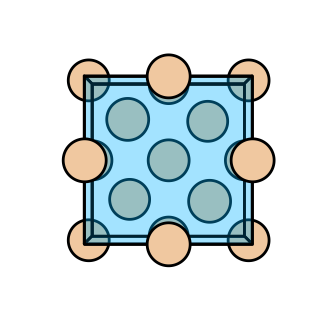

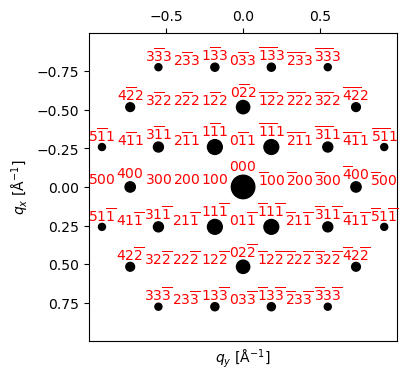

100%|█████████████████████████████████████████████████████████████████████████████| 4765/4765 [00:25<00:00, 184.14it/s]


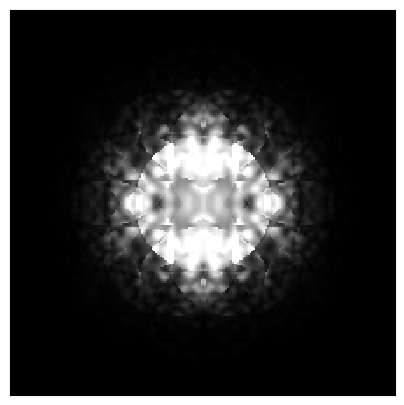

In [4]:
Si = defMaterial(
    [[0.25, 0.75, 0.25],
     [0.0,  0.0,  0.5],
     [0.25, 0.25, 0.75],
     [0.0,  0.5,  0.0],
     [0.75, 0.75, 0.75],
     [0.5,  0.0,  0.0],
     [0.75, 0.25, 0.25],
     [0.5,  0.5,  0.5],],
    14,
    5.468728
)

# code for collecting user input

for i in range(121, 122):
    simImg(Si, i)

In [393]:
global path
from PIL import Image
import numpy
import pandas as pd
import os
#provides centered simulated image at 384 by 384
def crop_sim(images):#use this to crop the simulation in the database
# check if the image ends with tif
    if (images.endswith(".tif")or images.endswith(".tiff")):
        # display
        # Open the TIFF image
        sim_file = '% s' % images
        add_on="/"
        file_tif = ''.join([add_on ,sim_file])
        full_path_tif =''.join([path ,file_tif])
        full_path = ''.join([path , add_on])
        f=''.join([full_path, sim_file])
        image = Image.open(f)
        width, height = image.size
        # Define the cropping amounts (left, top, right, bottom)
        # Define the cropping coordinates (left, upper, right, lower)
        left = 65.5
        upper = 60.5
        right = width - 50.5
        lower = height - 55.5

        # Crop the image
        cropped_image = image.crop((left, upper, right, lower))
        image.close()
        # Save the cropped image
        return cropped_image.save(full_path+sim_file)
for images in os.listdir(path):
    crop_sim(images)

In [269]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
def pre_process_image(filename):
    # Load your image
    image = cv2.imread(filename, cv2.IMREAD_GRAYSCALE)
    
    # Thresholding to segment the TEM pattern
    _, binary_image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY)
    
    # Calculate the center of mass
    M = cv2.moments(binary_image)
    center_x = int(M["m10"] / M["m00"])
    center_y = int(M["m01"] / M["m00"])
    
    # Get image dimensions
    height, width = image.shape
    
    # Calculate the shift needed to center the TEM pattern
    shift_x = width // 2 - center_x
    shift_y = height // 2 - center_y
    
    # Shift the image
    shifted_image = np.roll(image, shift_x, axis=1)
    shifted_image = np.roll(shifted_image, shift_y, axis=0)
    
    # Save the centered image 
    center_output_filename = 'C:/Users/Angelo Carrion/Centered_Exp.tif'
    cv2.imwrite(center_output_filename, shifted_image)

    
    #start scaling the image
    image = plt.imread(center_output_filename)
    # Get the aspect ratio of the image
    aspect_ratio = image.shape[1] / image.shape[0]
    
    # Set the size of the figure based on the aspect ratio
    fig_width = 11# Adjust as needed
    fig_height = fig_width / aspect_ratio
    
    # Create a figure with the specified size and background color
    fig = plt.figure(figsize=(fig_width, fig_height), facecolor='black')
    
    # Display the image in grayscale
    plt.imshow(image, cmap='gray')
    
    # Turn off axis
    plt.axis('off')
    
    # Save the displayed image
    blowup_output_filename = 'C:/Users/Angelo Carrion/blowup_Exp.tif'
    plt.savefig(blowup_output_filename, bbox_inches='tight', pad_inches=0)
    # Close the figure to release memory
    plt.close(fig)

    #start the resize
    image = cv2.imread(blowup_output_filename, cv2.IMREAD_GRAYSCALE)
    
    # Get the center of the image
    center_x, center_y = image.shape[1] // 2, image.shape[0] // 2
    
    # Calculate the desired dimensions of the resized image
    desired_width, desired_height = 384, 384
    
    # Calculate the cropping region
    left = max(0, center_x - desired_width // 2)
    top = max(0, center_y - desired_height // 2)
    right = min(image.shape[1], center_x + desired_width // 2)
    bottom = min(image.shape[0], center_y + desired_height // 2)
    
    # Crop the region containing the TEM pattern
    cropped_region = image[top:bottom, left:right]
    
    # Resize the cropped region to the desired dimensions
    resized_cropped_region = cv2.resize(cropped_region, (desired_width, desired_height), interpolation=cv2.INTER_LINEAR)
    
    # Save the final image
    resize_output_filename = 'C:/Users/Angelo Carrion/Resized_Exp.tif'
    cv2.imwrite(resize_output_filename, resized_cropped_region)
#beginnning the rotattion for the image
    # Load your image
    image = cv2.imread(resize_output_filename, cv2.IMREAD_GRAYSCALE)
    
    # Preprocess the image (e.g., apply Gaussian blur, edge detection)
    blurred_image = cv2.GaussianBlur(image, (5, 5), 0)
    edges = cv2.Canny(blurred_image, 50, 150)
    
    # Find contours in the edge-detected image
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    
    # Calculate the orientation angle of the largest contour
    if contours:
        # Select the largest contour based on area
        largest_contour = max(contours, key=cv2.contourArea)
        # Fit an ellipse to the contour
        ellipse = cv2.fitEllipse(largest_contour)
        # Extract the angle of rotation from the fitted ellipse
        rotation_angle = ellipse[2]
        print("Orientation from horizontal:", rotation_angle, "degrees")
        # Adjust rotation angle to orient the image correctly
        if ellipse[1][1] > ellipse[1][0]:
            rotation_angle = 353
    else:
        rotation_angle = 0  # Default to no rotation if no contours are found
    
    # Rotate the image by the calculated angle
    center_x, center_y = image.shape[1] // 2, image.shape[0] // 2
    rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), rotation_angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (image.shape[1], image.shape[0]), flags=cv2.INTER_LINEAR)
    
    # Save the rotated image
    global processed_output_file
    processed_output_filename = 'C:/Users/Angelo Carrion/processed_Exp_image.tif'
    cv2.imwrite(processed_output_filename, rotated_image)
    os.remove(center_output_filename)
    os.remove(blowup_output_filename)
    #os.remove(resize_output_filename)
    return processed_output_filename

In [270]:
import numpy as np
from scipy.optimize import curve_fit
global path
from scipy.optimize import least_squares
global path
from PIL import Image
import numpy
import pandas as pd
import os
def get_best_image(filename, images):
        def linear_func(x, a, b):
            return a * x + b
        #opening both the input file and the 
        #simulated files
        img = Image.open(filename)
        sim_file = '% s' % images
        add_on="/"
        file_tif = ''.join([add_on ,sim_file])
        global full_path_tif
        full_path_tif =''.join([path ,file_tif])
        img2 = Image.open(full_path_tif).convert('L')
        imarray = numpy.array(img)
        imarray2 = numpy.array(img2)
        #reshape images into 1D arrays
        flatten_image1 = imarray.reshape(-1) # flatten the array into a 1D vector
        flatten_image2 = imarray2.reshape(-1) # flatten the array into a 1D vector
        imarray = numpy.array(flatten_image1)
        imarray2 = numpy.array(flatten_image2)
        #using curve fit, best for non-linear least square fitting methods
        params1, _ = curve_fit(linear_func, flatten_image1, flatten_image2)
        #creating the desired linear function using the input picture
        #and the paramters to create a line that should be comapred to
        fitted_line = linear_func(flatten_image1, *params1)
        mse = (np.mean((flatten_image2 - fitted_line) ** 2))/100
        #print(full_path_tif)
        #print(f'Mean Squared Error percentage: {mse}')
        return mse, full_path_tif

Orientation from horizontal: 142.20372009277344 degrees
1.1355204135930403
49 nm +- 2 nm


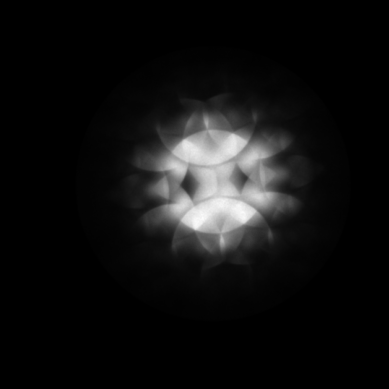

In [273]:
global path
global full_path_tif
from scipy.optimize import least_squares
global path
from PIL import Image
import numpy
import pandas as pd
import os
import matplotlib.pyplot as plt
filename ='C:/Users/Angelo Carrion/Exp_2.tif'

    # Load the TIFF file
image = mpimg.imread(filename)
plt.figure(facecolor='black')
    # Create a new figure and display the image with black borders
plt.imshow(image, cmap='gray')
    
    # Remove axis
plt.axis('off')
    
    # Save the figure
bright_output_filename = 'C:/Users/Angelo Carrion/Bright_Exp.tif'
plt.savefig(bright_output_filename)
processed_output_file = pre_process_image(bright_output_filename)

list_num = []
list_name = []
for images in os.listdir(path):
    # check if the image ends with tif 
    list_num.append(get_best_image(processed_output_file, images)[0])
    list_name.append(get_best_image(processed_output_file, images)[1])
min_value = min(list_num)
min_value_name = list_name[list_num.index(min_value)]
print(min_value)
names_with_same_error = []
# Find indices of values with the same error place as the minimum value
indices_with_same_error = [i for i, value in enumerate(list_num) if int(value * 10) % 10 == reference_tenths and int(value) % 10 == ones_place]

# Get names associated with the values at these indices
names_with_same_error = [list_name[i] for i in indices_with_same_error]

min_value = min(list_num)
min_value_name = list_name[list_num.index(min_value)]

# Extract ones place and tenths place from the minimum value
ones_place = int(min_value) % 10
reference_tenths = int(min_value * 10) % 10

# Find values that contain the same tenths place and ones place as the reference value (#.#)
values_with_same_error = [value for value in list_num if int(value * 10) % 10 == reference_tenths and int(value) % 10 == ones_place]

number = ''.join(filter(str.isdigit, min_value_name))
if number:
    result = number
    add_on = " nm"
    best = ''.join([result, add_on])
else:
    print("No numbers found in the string.")

# Initialize a list to store the nm_best strings
nm_best_list = []

# Iterate over each name with the same error
for name in names_with_same_error:
    number = ""
    
    # Iterate over each character in the name string
    for char in name:
        if char.isdigit():
            number += char

    if number:  # Check if any digits were found in the string
        result = number
        add_on = " nm"
        nm_best = ''.join([result, add_on])  # Construct the string with the extracted number and " nm"
        nm_best_list.append(nm_best)  # Append nm_best to the list  
    else:
        print("No numbers found in the string for name:", name)
numerical_value_best = int(''.join(filter(str.isdigit, best)))
numerical_values = []
error_values=[]
for names in nm_best_list:
    numerical_value = int(''.join(filter(str.isdigit, names)))  # Extract numerical par
    numerical_values.append(numerical_value)
    # Perform subtraction
for numbers in numerical_values:
    if(numerical_value_best == numbers):
        continue
    else:
        error_values.append(abs(numbers - numerical_value_best))

if error_values:  # Check if error_values is not empty
    max_error = max(error_values)
else:
    print("No max error, resim and check image processing") 
error_pl = str(error_nm)
add_on=" nm"
error_best = ''.join([error_pl ,add_on])
add_PL = ' +- '
plus_minus = ''.join([add_PL ,error_best])
final_value = ''.join([best ,plus_minus])
print(final_value)
best_fit_image = '% s' %min_value_name
img = Image.open(best_fit_image)
img.show()
img.close()
#Exp 1 - rotation angle 0
#EXp 2 - rotation angle 211

In [156]:

    #beginnning the rotattion for the image
    def compare_orientations(pattern1, pattern2):
        # Step 1: Detect keypoints and compute descriptors
        detector = cv2.SIFT_create()
        keypoints1, descriptors1 = detector.detectAndCompute(pattern1, None)
        keypoints2, descriptors2 = detector.detectAndCompute(pattern2, None)
    
        # Step 2: Match keypoints
        matcher = cv2.BFMatcher()
        matches = matcher.match(descriptors1, descriptors2)
    
        # Step 3: Estimate transformation
        matched_keypoints1 = np.float32([keypoints1[m.queryIdx].pt for m in matches]).reshape(-1, 1, 2)
        matched_keypoints2 = np.float32([keypoints2[m.trainIdx].pt for m in matches]).reshape(-1, 1, 2)
        transformation_matrix, _ = cv2.findHomography(matched_keypoints1, matched_keypoints2, cv2.RANSAC)
    
        # Step 4: Compare orientations
        angle_difference = np.rad2deg(np.arccos(transformation_matrix[0, 0]))
        return angle_difference

    # Load TEM patterns
    pattern1 = cv2.imread(, cv2.IMREAD_GRAYSCALE)
    pattern2 = cv2.imread('C:/Users/Angelo Carrion/simulationss/1 nm.tif', cv2.IMREAD_GRAYSCALE)
    
    # Compare orientations
    angle_difference = compare_orientations(pattern1, pattern2)
    print("Angle difference between patterns:", angle_difference)


Angle difference between patterns: 134.45861261268388


In [268]:
names_with_same_error = []
# Find indices of values with the same error place as the minimum value
indices_with_same_error = [i for i, value in enumerate(list_num) if int(value * 10) % 10 == reference_tenths and int(value) % 10 == ones_place]

# Get names associated with the values at these indices
names_with_same_error = [list_name[i] for i in indices_with_same_error]

min_value = min(list_num)
min_value_name = list_name[list_num.index(min_value)]

# Extract ones place and tenths place from the minimum value
ones_place = int(min_value) % 10
reference_tenths = int(min_value * 10) % 10

# Find values that contain the same tenths place and ones place as the reference value (#.#)
values_with_same_error = [value for value in list_num if int(value * 10) % 10 == reference_tenths and int(value) % 10 == ones_place]

number = ''.join(filter(str.isdigit, min_value_name))
if number:
    result = number
    add_on = " nm"
    best = ''.join([result, add_on])
else:
    print("No numbers found in the string.")

# Initialize a list to store the nm_best strings
nm_best_list = []

# Iterate over each name with the same error
for name in names_with_same_error:
    number = ""
    
    # Iterate over each character in the name string
    for char in name:
        if char.isdigit():
            number += char

    if number:  # Check if any digits were found in the string
        result = number
        add_on = " nm"
        nm_best = ''.join([result, add_on])  # Construct the string with the extracted number and " nm"
        nm_best_list.append(nm_best)  # Append nm_best to the list  
    else:
        print("No numbers found in the string for name:", name)
numerical_value_best = int(''.join(filter(str.isdigit, best)))
numerical_values = []
error_values=[]
for names in nm_best_list:
    numerical_value = int(''.join(filter(str.isdigit, names)))  # Extract numerical par
    numerical_values.append(numerical_value)
    # Perform subtraction
for numbers in numerical_values:
    if(numerical_value_best == numbers):
        continue
    else:
        error_values.append(abs(numbers - numerical_value_best))
error_nm = max(error_values)  
error_pl = str(error_nm)
add_on=" nm"
error_best = ''.join([error_pl ,add_on])
add_PL = ' +- '
plus_minus = ''.join([add_PL ,error_best])
final_value = ''.join([best ,plus_minus])
print(final_value)

ValueError: max() arg is an empty sequence